In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

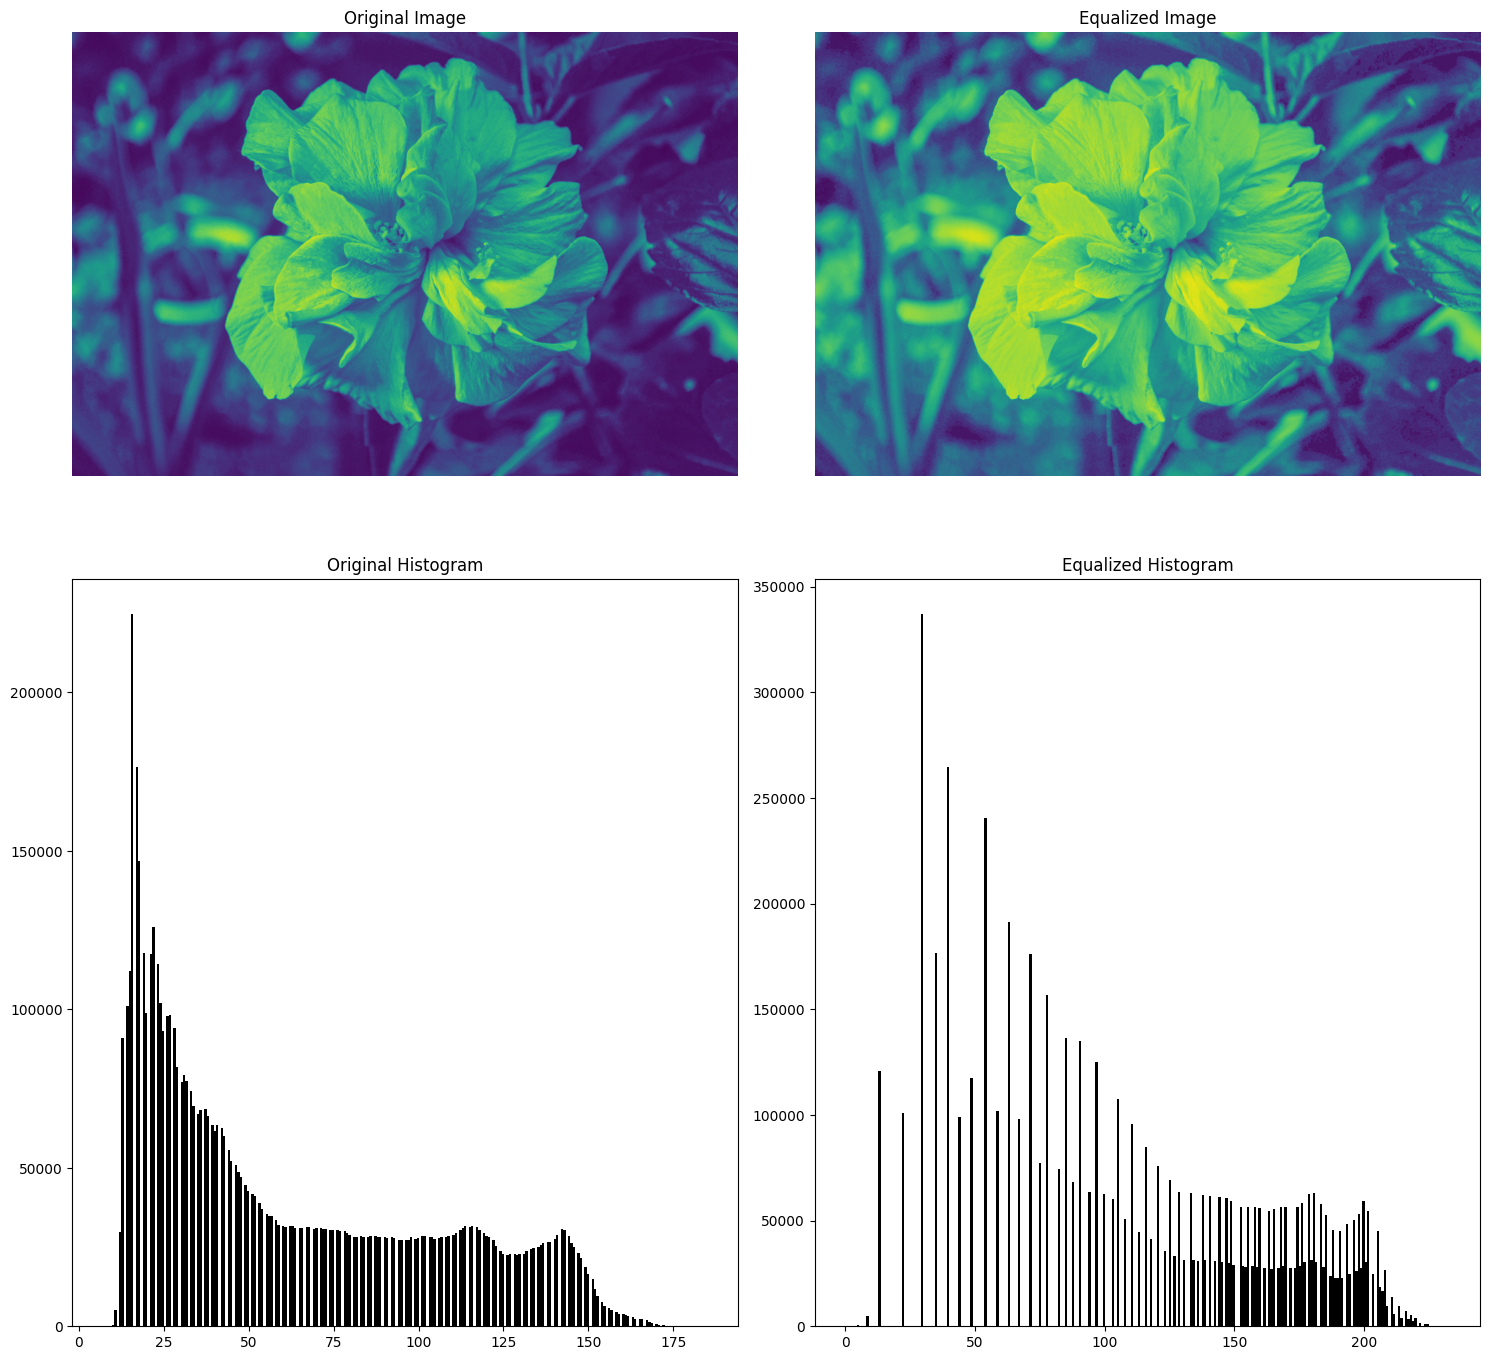

In [2]:
with Image.open('input_images/img6.jpg') as imp_img:
        gray_image = imp_img.convert("L")
        gray_image_array = np.array(gray_image)

        dct = dict()
        total_pixel = len(gray_image_array)*len(gray_image_array[0])

        for i in range(len(gray_image_array)):
            for j in range(len(gray_image_array[0])):
                dct[gray_image_array[i][j]]= dct.get(gray_image_array[i][j],0)+1
        
        lst = [(k, v) for k, v in dct.items()]
        lst.sort(key=lambda x: x[0])
        num_arr = np.array(lst)

        cdf = num_arr.cumsum(axis=0)
        cdf_normalized = cdf / total_pixel
        cdf_normalized = (cdf_normalized * 255).astype('uint8')

        equalized_image_array = np.zeros_like(gray_image_array)

        for i in range(len(gray_image_array)):
            for j in range(len(gray_image_array[0])):
                normalized_intensity = int((gray_image_array[i][j] / 255) * 174)
                equalized_image_array[i][j] = cdf_normalized[normalized_intensity, 1]

        equalized_image = Image.fromarray(equalized_image_array)

        plt.figure(figsize=(15,15))
        plt.subplot(2,2,1)
        plt.imshow(gray_image,cmap='gray')
        plt.title('Original Image')
        plt.axis('off')
        plt.subplot(2,2,2)
        plt.imshow(equalized_image,cmap='gray')
        plt.title('Equalized Image')
        plt.axis('off')

        plt.subplot(2, 2, 3)
        plt.hist(gray_image_array.flatten(), bins=256, color='black')
        plt.title('Original Histogram')

        plt.subplot(2, 2, 4)
        plt.hist(equalized_image_array.flatten(), bins=256, color='black')
        plt.title('Equalized Histogram')
        plt.tight_layout()
        plt.show()